In [20]:
#3.1 Warming Up Exercises - Basic Inspection and Exploration:
#Problem 1 - Data Read, Write and Inspect:("bank.csv")


import pandas as pd

# Load the dataset into a pandas DataFrame
file_path = "I:/Second Year/AI Workshop/CSV/bank.csv"

try:
    data = pd.read_csv(file_path)
    print(data.head()) # Display the first few rows of the DataFrame
except Exception as e:
    print(e) # Print the error message if something goes wrong



   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [11]:
#2.Check info of the DataFrame and identify following:
#(a) columns with dtypes=object
#(b) unique values of those columns.
#(c) check for the total number of null values in each column.

# Checking info of the DataFrame
data_info = data.info()

# (a) Identifying columns with dtype=object
object_columns = data.select_dtypes(include=['object']).columns.tolist()

# (b) Getting unique values for each object column
unique_values = {col: data[col].unique() for col in object_columns}

# (c) Checking the total number of null values in each column
null_values = data.isnull().sum()

data_info, object_columns, unique_values, null_values



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      200000 non-null  float64
 1   Age             200000 non-null  float64
 2   Gender          200000 non-null  object 
 3   Height          200000 non-null  float64
 4   Weight          200000 non-null  float64
 5   Blood Type      200000 non-null  object 
 6   BMI             200000 non-null  float64
 7   Temperature     200000 non-null  float64
 8   Heart Rate      200000 non-null  float64
 9   Blood Pressure  200000 non-null  float64
 10  Cholesterol     200000 non-null  float64
 11  Diabetes        200000 non-null  object 
 12  Smoking         200000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB


(None,
 ['Gender', 'Blood Type', 'Diabetes', 'Smoking'],
 {'Gender': array(['Female', 'Male'], dtype=object),
  'Blood Type': array(['O', 'B', 'A', 'AB'], dtype=object),
  'Diabetes': array(['No', 'Yes'], dtype=object),
  'Smoking': array(['No', 'Yes'], dtype=object)},
 Student ID        0
 Age               0
 Gender            0
 Height            0
 Weight            0
 Blood Type        0
 BMI               0
 Temperature       0
 Heart Rate        0
 Blood Pressure    0
 Cholesterol       0
 Diabetes          0
 Smoking           0
 dtype: int64)

In [25]:
#3.Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in ".csv” with name "banknumericdata.csv”
import pandas as pd

# Load the dataset
file_path = r"I:\Second Year\AI Workshop\CSV\bank.csv"

try:
    # Reading the dataset
    data = pd.read_csv(file_path)

    # Dropping columns with dtype=object
    numeric_data = data.select_dtypes(exclude=['object'])

    # Saving the numeric DataFrame to a CSV file
    output_file_path = "banknumericdata.csv"
    numeric_data.to_csv(output_file_path, index=False)

    print(f"Numeric data saved successfully to {output_file_path}")
except Exception as e:
    print(f"Error: {e}")


Numeric data saved successfully to banknumericdata.csv


In [3]:
#4.Read the "banknumericdata.csv" file to find summary statistics
import pandas as pd
file_path = "I:/Second Year/AI Workshop/IshaBhatta_2408180_Worksheet2/banknumericdata.csv"

try:
    # Reading the dataset
    numeric_data = pd.read_csv(file_path)

    # Getting the summary statistics
    summary_statistics = numeric_data.describe()

except Exception as e:
    summary_statistics = f"Error occurred: {e}"

summary_statistics


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [13]:
#Problem 2 - Data Imputations:"medical_student.csv"

#1.Load the provided dataset and import in pandas DataFrame.
import pandas as pd  # Import pandas library

# Specify the file path (adjust this to your file location)
file_path = r"I:\Second Year\AI Workshop\CSV\medical_students_dataset.csv"

# Try loading the dataset
try:
    data = pd.read_csv(file_path)  # Load dataset into DataFrame
    print(data.head())  # Display the first few rows to confirm it's loaded
except Exception as e:
    print(f"Error occurred: {e}")




   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  


In [8]:
#2.Check info of the DataFrame and identify column with missing (null) values.
import pandas as pd

# Specify the file path (adjust this to your file location)
file_path = r"I:\Second Year\AI Workshop\CSV\medical_students_dataset.csv"

try:
    # Load the dataset into a DataFrame
    data = pd.read_csv(file_path)

    # Get general information about the DataFrame
    data_info = data.info()

    # Identify columns with missing (null) values
    missing_values = data.isnull().sum()

    # Print the DataFrame info and missing values
    print("DataFrame Info:")
    print(data_info)
    print("\nColumns with Missing (Null) Values:")
    print(missing_values[missing_values > 0])

except Exception as e:
    print(f"Error occurred: {e}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
DataFrame Info:
None

Columns with Missing (Null) Values:
Student ID        20000
Age               20000
Gender            20000
Height          

In [10]:
import pandas as pd

# Specify the file path (adjust this to your file location)
file_path = r"I:\Second Year\AI Workshop\CSV\medical_students_dataset.csv"

try:
    # Load the dataset into a DataFrame
    data = pd.read_csv(file_path)

    # Identify columns with missing values
    missing_values = data.isnull().sum()
    print("Columns with Missing Values:")
    print(missing_values[missing_values > 0])

    # Filling missing values based on the type of column
    for column in data.columns:
        if data[column].dtype == 'object':  # For categorical columns
            # Fill missing values with the mode (most frequent value)
            mode_value = data[column].mode()[0]
            data[column] = data[column].fillna(mode_value)
            print(f"Filled missing values in column '{column}' with the mode: {mode_value}")

        elif data[column].dtype in ['int64', 'float64']:  # For numerical columns
            # Check for the presence of outliers, and choose the appropriate method
            if data[column].isnull().sum() > 0:
                # Fill missing values with the median (more robust to outliers)
                median_value = data[column].median()
                data[column] = data[column].fillna(median_value)
                print(f"Filled missing values in column '{column}' with the median: {median_value}")

    # Verify that all missing values are filled
    missing_values_after_fill = data.isnull().sum()
    print("\nMissing Values After Filling:")
    print(missing_values_after_fill)

except Exception as e:
    print(f"Error occurred: {e}")



Columns with Missing Values:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64
Filled missing values in column 'Student ID' with the median: 49943.5
Filled missing values in column 'Age' with the median: 26.0
Filled missing values in column 'Gender' with the mode: Male
Filled missing values in column 'Height' with the median: 174.8999141442403
Filled missing values in column 'Weight' with the median: 69.9793837798508
Filled missing values in column 'Blood Type' with the mode: B
Filled missing values in column 'BMI' with the median: 22.671401449817218
Filled missing values in column 'Temperature' with the median: 98.5996537029178
Filled missing values in column 'Heart Rate' with the median: 80.0
Filled missing values

In [10]:
#4.4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.{Hint: dataset.duplicated.sum()}
import pandas as pd

# Specify the file path (adjust this to your file location)
file_path = r"I:\Second Year\AI Workshop\CSV\medical_students_dataset.csv"

try:
    # Load the dataset into a DataFrame
    data = pd.read_csv(file_path)

    # Check for duplicate rows
    duplicate_rows = data.duplicated().sum()  # Count the duplicate rows
    print(f"Number of duplicate rows: {duplicate_rows}")

    # If duplicates are found, drop them
    if duplicate_rows > 0:
        # Remove duplicate rows
        data = data.drop_duplicates()
        print(f"Duplicate rows removed. Total rows after removal: {len(data)}")
    else:
        print("No duplicate rows found.")

    # Verify that duplicates are removed
    print(f"Number of duplicate rows after removal: {data.duplicated().sum()}")

except Exception as e:
    print(f"Error occurred: {e}")


Number of duplicate rows: 7644
Duplicate rows removed. Total rows after removal: 192356
Number of duplicate rows after removal: 0


In [9]:
#3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:Dataset Used: "titanic.csv"
#1. Problem - 1:Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,median, maximum value, and minimum value of the ’Fare’ column?

import pandas as pd

# Specify the file path (adjust this to your file location)
file_path = r"I:\Second Year\AI Workshop\CSV\medical_students_dataset.csv"

try:
    # Load the dataset into a DataFrame
    data = pd.read_csv(file_path)

    # Subset the DataFrame for the specified columns
    subset_data = data[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

    # Filter rows where 'Pclass' equals 1 (first-class passengers)
    first_class_data = subset_data[subset_data['Pclass'] == 1]

    # Calculate the mean, median, max, and min of the 'Fare' column
    fare_mean = first_class_data['Fare'].mean()
    fare_median = first_class_data['Fare'].median()
    fare_max = first_class_data['Fare'].max()
    fare_min = first_class_data['Fare'].min()

    # Print the results
    print(f"Mean of 'Fare': {fare_mean}")
    print(f"Median of 'Fare': {fare_median}")
    print(f"Maximum value of 'Fare': {fare_max}")
    print(f"Minimum value of 'Fare': {fare_min}")

except Exception as e:
    print(f"Error occurred: {e}")


Error occurred: "['Name', 'Pclass', 'Sex', 'Fare', 'Survived'] not in index"


In [12]:
#2.Problem - 2:How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found this out, drop them from your DataFrame.

import pandas as pd

# Specify the file path (adjust this to your file location)
file_path = r"I:\Second Year\AI Workshop\CSV\medical_students_dataset.csv"

try:
    # Load the dataset into a DataFrame
    data = pd.read_csv(file_path)

    # Subset the DataFrame for the specified columns
    subset_data = data[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

    # Check for the number of null values in the 'Age' column
    null_values_age = subset_data['Age'].isnull().sum()
    print(f"Number of null values in 'Age' column: {null_values_age}")

    # Drop rows where 'Age' is null
    subset_data_cleaned = subset_data.dropna(subset=['Age'])

    # Verify the number of null values in 'Age' after dropping
    null_values_age_after = subset_data_cleaned['Age'].isnull().sum()
    print(f"Number of null values in 'Age' column after dropping: {null_values_age_after}")

except Exception as e:
    print(f"Error occurred: {e}")


Error occurred: "['Name', 'Pclass', 'Sex', 'Fare', 'Survived'] not in index"


In [7]:
#3. Problem-3:The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarkation:
import pandas as pd

# Load the dataset into a DataFrame (use the correct file path for your dataset)
file_path = r"I:\Second Year\AI Workshop\CSV\titanic_dataset.csv"  # Adjust the file path as needed

try:
    # Load the Titanic dataset
    data = pd.read_csv(file_path)

    # Perform one-hot encoding on the 'Embarked' column
    embarked_encoded = pd.get_dummies(data['Embarked'], prefix='Embarked')

    # Add the new encoded columns to the original DataFrame
    data = pd.concat([data, embarked_encoded], axis=1)

    # Drop the original 'Embarked' column
    data.drop(columns=['Embarked'], inplace=True)

    # Print the first few rows of the modified DataFrame to verify the changes
    print(data.head())

except Exception as e:
    print(f"Error occurred: {e}")





   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


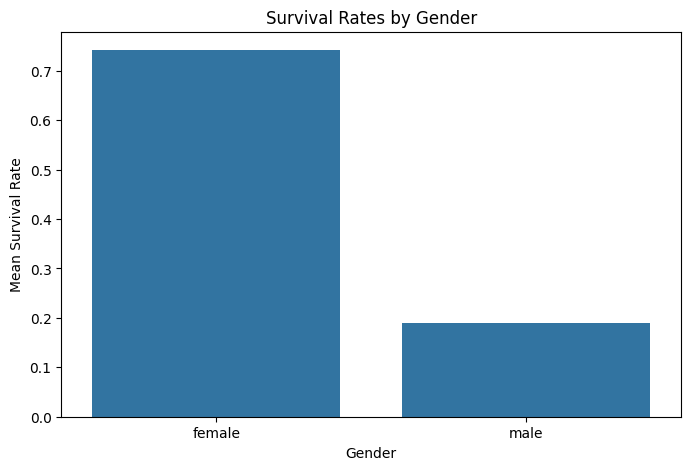

In [8]:
#4.Problem: Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visualization to show how the survival distributions vary by gender.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset into a DataFrame (ensure the correct file path)
file_path = r"I:\Second Year\AI Workshop\CSV\titanic_dataset.csv"  # Adjust the file path as needed

try:
    # Load the Titanic dataset
    data = pd.read_csv(file_path)

    # Group by 'Sex' and calculate the mean survival rate for each gender
    survival_by_gender = data.groupby('Sex')['Survived'].mean()

    # Print the mean survival rates
    print(survival_by_gender)

    # Visualize the survival distribution by gender using a seaborn barplot
    plt.figure(figsize=(8, 5))
    sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values)
    plt.title('Survival Rates by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Mean Survival Rate')
    plt.show()

except Exception as e:
    print(f"Error occurred: {e}")


Mean Survival Rates by Gender and Embarkation Port:
  Embarked     Sex  Survived
0        C  female  0.876712
1        C    male  0.305263
2        Q  female  0.750000
3        Q    male  0.073171
4        S  female  0.689655
5        S    male  0.174603


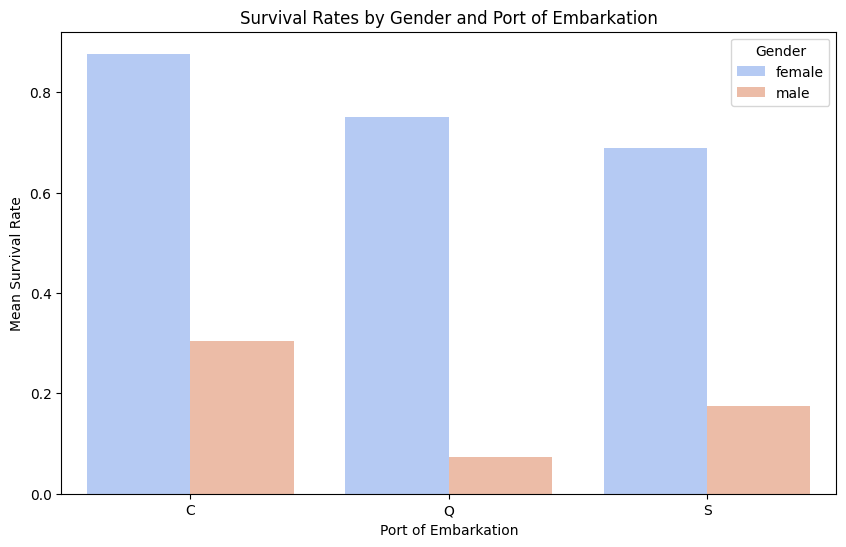

In [17]:
#5.Problem - 5:Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file path
file_path = r"I:\Second Year\AI Workshop\CSV\titanic_dataset.csv"

try:
    # Load the Titanic dataset
    data = pd.read_csv(file_path)

    # Group by 'Embarked' and 'Sex' to calculate the mean survival rate
    survival_by_gender_port = data.groupby(['Embarked', 'Sex'])['Survived'].mean().reset_index()

    # Print the survival rates
    print("Mean Survival Rates by Gender and Embarkation Port:")
    print(survival_by_gender_port)

    # Visualize survival rates broken down by gender and port of embarkation
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Embarked', y='Survived', hue='Sex', data=survival_by_gender_port, palette='coolwarm')
    plt.title('Survival Rates by Gender and Port of Embarkation')
    plt.xlabel('Port of Embarkation')
    plt.ylabel('Mean Survival Rate')
    plt.legend(title='Gender')
    plt.show()

except Exception as e:
    print(f"Error occurred: {e}")

In [31]:
#OPTIONAL
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset into a DataFrame (ensure the correct file path)
file_path = r"I:\Second Year\AI Workshop\CSV\titanic_dataset.csv"  # Adjust the file path as needed

try:
    # Load the Titanic dataset
    data = pd.read_csv(file_path)

    # Break 'Age' into 5 quantiles
    data['AgeGroup'] = pd.qcut(data['Age'], q=5, labels=["Q1", "Q2", "Q3", "Q4", "Q5"])

    # Group by 'Pclass' and 'AgeGroup' and calculate the mean survival rate
    survival_by_class_age = data.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().reset_index()

    # Print the results for verification
    print(survival_by_class_age)

    # Create a heatmap to visualize the survival rates by class and age group
    survival_pivot = survival_by_class_age.pivot('AgeGroup', 'Pclass', 'Survived')

    plt.figure(figsize=(8, 6))
    sns.heatmap(survival_pivot, annot=True, cmap="coolwarm", fmt='.2f', cbar=True)
    plt.title('Survival Rates by Age Group and Passenger Class')
    plt.xlabel('Passenger Class')
    plt.ylabel('Age Group')
    plt.show()

except Exception as e:
    print(f"Error occurred: {e}")


    Pclass AgeGroup  Survived
0        1       Q1  0.809524
1        1       Q2  0.761905
2        1       Q3  0.666667
3        1       Q4  0.777778
4        1       Q5  0.506667
5        2       Q1  0.742857
6        2       Q2  0.400000
7        2       Q3  0.416667
8        2       Q4  0.461538
9        2       Q5  0.363636
10       3       Q1  0.333333
11       3       Q2  0.197674
12       3       Q3  0.283582
13       3       Q4  0.166667
14       3       Q5  0.088235
Error occurred: DataFrame.pivot() takes 1 positional argument but 4 were given


C:\Users\Isha\AppData\Local\Temp\ipykernel_17044\1416089539.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_by_class_age = data.groupby(['Pclass', 'AgeGroup'])['Survived'].mean().reset_index()
